In [ ]:
# Data Science Software Laboratory III

!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("social_network_ad.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df_copy = df.copy()

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
drop_list = ["User ID", "Purchased"]
df_trian = df_copy.drop(drop_list, axis=1)
X = df_trian
y = df_copy["Purchased"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
X_gender = X["Gender"]

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

enc = ce.OneHotEncoder(handle_unknown="ignore")
X_gender = X_gender.to_numpy().reshape(-1,1)
enc.fit(X_gender)
transformed_data = enc.transform(X_gender)
transformed_data = transformed_data.to_numpy()

In [ ]:
transformed_data

array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1,

In [ ]:
X["Gender"] = transformed_data

In [ ]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.23, random_state=42)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
# pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)

In [ ]:
pipe.score(X_test, y_test)

0.8913043478260869

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)

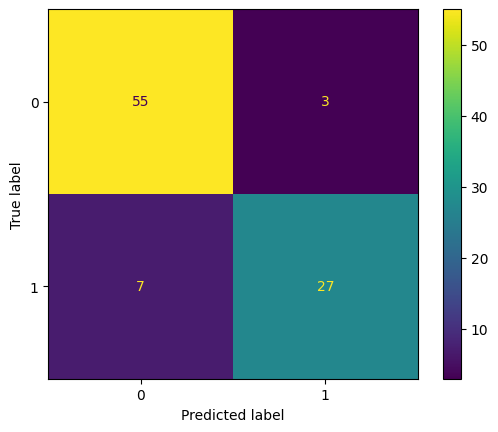

In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92        58\n           1       0.90      0.79      0.84        34\n\n    accuracy                           0.89        92\n   macro avg       0.89      0.87      0.88        92\nweighted avg       0.89      0.89      0.89        92\n'

In [ ]:
true_positive, false_negative, false_positve, true_negative = confusion_matrix(y_test, y_pred, labels=[0,1]).reshape(-1)
print(true_positive, false_positve, true_negative, false_negative)

55 7 27 3


In [ ]:
accuracy = (true_positive + true_negative) / (true_positive + false_positve + true_negative + false_negative)
precision = true_positive / (true_positive + false_positve)
recall = true_positive / (true_positive + false_negative)
f1 = 2 / (1/recall) + (1/precision)

In [ ]:
print(accuracy, precision, recall, f1)

0.8913043478260869 0.8870967741935484 0.9482758620689655 3.0238244514106585
